In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 5 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent 

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rcParams['axes.unicode_minus'] = False

plt.rc('font', family='NanumGothic')


In [ ]:
import pandas as pd
df = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/datasets/DF_sample1.xlsx", engine = "openpyxl")
df

,sex,age,emotion
0,여,20.0,분노
1,여,20.0,분노
2,여,20.0,분노
3,남,20.0,분노
4,여,40.0,분노
...,...,...,...
3515,여,20.0,슬픔
3516,여,20.0,슬픔
3517,여,20.0,슬픔
3518,남,20.0,슬픔


In [ ]:
df.groupby('sex').size()

sex
남    1442
여     2078
dtype: int64

In [ ]:
df.sex.value_counts()

여     2078
남    1442
Name: sex, dtype: int64

<function matplotlib.pyplot.show(*args, **kw)>

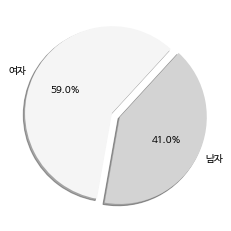

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import rc

rc('font', family='NanumBarunGothic') 

labels = ['여자','남자']
explode = [0.05, 0.05]
colors = ['whitesmoke', 'lightgray']

plt.pie(df.sex.value_counts(), labels=labels, autopct='%.1f%%', startangle=260, counterclock=False, explode=explode, shadow=True, colors=colors)
plt.show

# df.sex.value_counts().plot(kind='pie',
#                               figsize = (10, 10),
#                               autopct = '%.1f%%',  
#                               fontsize = 15)
# plt.xlabel('Emotion', fontsize=18)
# plt.ylabel('Image', fontsize=18)
# plt.grid(True, axis='y')
# plt.xticks(rotation = 0)
# plt.ylim(66500, 67750)
# plt.savefig('model_comparison', transparent = True)

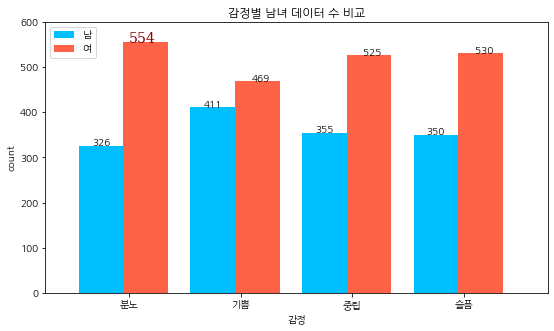

<Figure size 432x288 with 0 Axes>

In [ ]:
#감정별 데이터 성비 비교

import numpy as np


plt.figure(figsize=(9,5))
feeling=['분노','기쁨','중립','슬픔']
gender_male=[326,411,355,350]
gender_female=[554,469,525,530]
colors=['deepskyblue','tomato']#['tomato','khaki','olivedrab','deepskyblue']
barWidth=0.4

n_data=len(feeling)
index=np.arange(n_data)


def add_value_label(index,gender_male):
    for i in range(0,len(index)):
        plt.text(i,gender_male[i],gender_male[i],ha="center")

add_value_label(index,gender_male)

plt.bar(index,gender_male,color='deepskyblue',width=barWidth,label='남')


font1 = {'family': 'serif',
      'color':  'darkred',
      'weight': 'normal',
      'size': 14}

font2 = {'family': 'Times New Roman',
      'color':  'blue',
      'weight': 'bold',
      'size': 12,
      'alpha': 0.7}


plt.text(0.25,554,'554', fontdict=font1)
plt.text(1.35,469,'469')
plt.text(2.35,525,'525')
plt.text(3.35,530,'530')

plt.bar(index+barWidth,gender_female,color='tomato',width=barWidth,label='여') #+0.1

plt.xticks(index+0.25,feeling)
plt.legend()
plt.xlim([-0.5,4])
plt.ylim([0,600])
plt.xlabel('감정')
plt.ylabel('count')
plt.title('감정별 남녀 데이터 수 비교')
plt.show()
plt.savefig('savefig.png')


In [ ]:
df1 = df['age'].value_counts().sort_index()
df1

10      66
20    2155
30     780
40     305
50     211
60       3
Name: age, dtype: int64

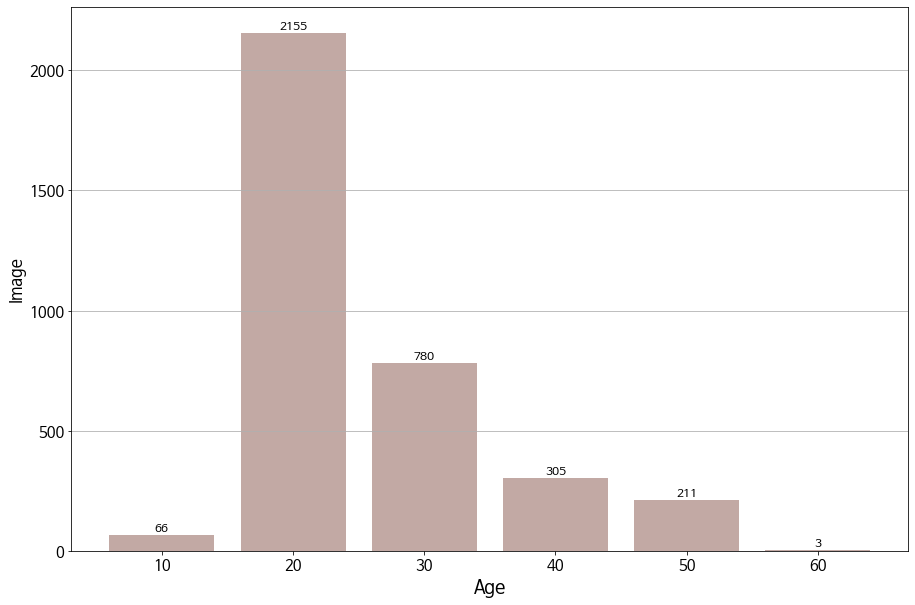

In [ ]:
import matplotlib.pyplot as plt

x = ['10','20','30','40','50','60']
y = [66,2155,780,305,211,3]

plt.figure(figsize=(15, 10))
plt.xlabel('Age', fontsize=18)
plt.ylabel('Image', fontsize=16)
plt.rc('xtick', labelsize=15)  # x축 눈금 폰트 크기 
plt.rc('ytick', labelsize=15)  # y축 눈금 폰트 크기
bar = plt.bar(x, y, color = '#C2A9A4')
plt.grid(True, axis='y')
# plt.ylim(0, 1.0)
plt.savefig('model_comparison', transparent = True)

# 숫자 넣는 부분
for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.f' % height, ha='center', va='bottom', size = 12)

plt.show()


## 감정별 RGB 확인

In [6]:
# 구글 마운트
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
import warnings
warnings.filterwarnings('ignore')

In [8]:
from PIL import Image
import numpy as np
from tabulate import tabulate
import os
import cv2

img_path = '/content/drive/MyDrive/Colab Notebooks/datasets/four_croppped_classes/angry_cropped_image/cropped_048_d80c5f0f42c439745698c39590c9bfb2996335424ee152c407ae1f08586252fe_남_10_분노_도심 환경_20210210141317-008-001.jpg'

img = cv2.imread(img_path) # 파일 경로

In [9]:
arr = np.array(Image.open(img_path))
print(arr.shape)
print(arr.ndim)

(500, 500, 3)
3


In [10]:
arr_mean = np.mean(arr, axis=(0,1))

print(f'[R={arr_mean[0]:.1f},  G={arr_mean[1]:.1f}, B={arr_mean[2]:.1f} ]')

[R=128.7,  G=112.0, B=107.4 ]


In [11]:
from PIL import Image
import numpy as np
import os
import pandas as pd

dst_img = "/content/drive/MyDrive/Colab Notebooks/datasets/four_croppped_classes/sad_cropped_image"
#listing files in images folder
list_img = os.listdir(dst_img)
#iterating over dst_image to get the images as arrays
for image in sorted(list_img):
    arr = np.array(Image.open(os.path.join(dst_img, image))) #creating arrays for all the images

    [h, w] = np.shape(arr)[0:2]#calculating height and width for each image
    arr_dim = arr.ndim #calculating the dimension for each array
    arr_shape = arr.shape #calculating the shape for each array
    arr_mean = np.mean(arr, axis=(0,1))

    if len(arr_mean) == 3: #RGB CASE
      print(f'[R={arr_mean[0]:.1f},  G={arr_mean[1]:.1f}, B={arr_mean[2]:.1f}]')

[R=167.8,  G=158.3, B=154.4]
[R=155.0,  G=109.0, B=117.1]
[R=128.2,  G=117.8, B=114.8]
[R=127.1,  G=122.7, B=106.7]
[R=126.4,  G=103.6, B=93.8]
[R=79.2,  G=72.9, B=68.5]
[R=162.5,  G=143.6, B=139.4]
[R=112.9,  G=98.1, B=90.4]
[R=110.1,  G=102.7, B=108.2]
[R=127.9,  G=109.8, B=103.0]
[R=126.4,  G=111.5, B=100.7]
[R=79.1,  G=62.9, B=52.0]
[R=130.9,  G=110.4, B=106.1]
[R=134.0,  G=108.6, B=108.5]
[R=141.0,  G=115.2, B=99.9]
[R=125.1,  G=121.9, B=119.7]
[R=104.5,  G=89.3, B=78.5]
[R=109.1,  G=97.3, B=91.3]
[R=103.3,  G=67.8, B=57.0]
[R=140.5,  G=123.1, B=110.6]
[R=139.1,  G=121.2, B=108.7]
[R=133.0,  G=142.1, B=119.3]
[R=97.8,  G=93.5, B=93.2]
[R=189.8,  G=168.5, B=157.6]
[R=125.3,  G=115.8, B=110.7]
[R=116.8,  G=101.3, B=91.9]
[R=142.2,  G=131.8, B=122.3]
[R=133.4,  G=122.8, B=118.3]
[R=136.5,  G=124.7, B=120.2]
[R=103.7,  G=90.3, B=86.6]
[R=100.2,  G=95.3, B=98.4]
[R=130.9,  G=122.5, B=111.6]
[R=127.9,  G=108.7, B=101.7]
[R=166.2,  G=140.0, B=131.4]
[R=159.3,  G=143.7, B=137.7]
[R=139.8,